# Kapasitas Gudang

# Introduction

## problem

kapasitas gudang dalam meter kubik 115.2 meter kubik
barang dalam meter kubik
1. beras, tepung, gula 0.36
2. mie instan 0.007
3. minyak 0.019

# Initiation

### Individu

In [237]:
# import module
import random
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [238]:
#beras, tepung, gula, mie, minyak
#barang = [0.36, 0.36, 0.36, 0.007, 0.019]

In [239]:
def create_individu(barang, max):
    #return [(random.randint(0, max)*i, for i in barang]
    individu = []
    for i in barang:
        jml = random.randint(1, max)
        individu.append((jml, round(jml*i, 2)))
    return individu

### Population

In [240]:
def create_population(num_of_individu, barang, max):
    return [create_individu(barang, max) for i in range(num_of_individu)]

### Fitness Function

In [241]:
def fitness_value(individu, target):
#     summed = sum(individu)
#     return int(target-summed)
    total = 0
    for i in individu:
        total += i[1]
    return round(float(target-total),3)

In [242]:
def calc_population_fitness(population, target):
    return [fitness_value(individu, target) for individu in population]

# Representation

## One Variable

# Parent Selection

## Best Selection

In [243]:
def best_selection(population, target):
    pop_tuple = [(idv, fitness_value(idv, target)) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda pop: pop[1])  # sort by fitness
    # return 2 best individu
    best2 = []
    for idv in sorted_tuple:
        best2.append(idv[0])
    return best2[0:2]
    #return sorted_tuple[0:2]

## Roulette

In [244]:
# # roulete
# def roulette(population, target):
#     '''
#     aturan :
#     jika telah terpilih 1 
#     maka individu itu harus terdelete dari populasi untuk dilakukan roulete lagi
#     '''
#     pop = population.copy()
#     selected = []
#     for i in range(2):
#         summed = sum(calc_population_fitness(pop, target))
#         point = random.uniform(0, summed)
#         total = 0
#         for individu in pop:
#             total = total + fitness_value(individu, target)
#             if point < total:
#                 selected.append(individu)
#                 pop.remove(individu) #hapus individu untuk roulete selanjutnya
#     return selected


def roulette(population, target):
    selected = []
    while(len(selected)<2):
        idv = do_roulette(population, target)
        if idv not in selected:
            selected.append(idv)
    return selected


def do_roulette(population, target):
    summed = sum(calc_population_fitness(population, target))
    point = random.uniform(0, summed)
    total = 0
    for individu in pop:
        total = total + fitness_value(individu, target)
        if point < total:
            return individu
    

## Simple Tournamen

In [245]:
def simple_tournament(population, target):
    random_idv = random.sample(population, 2)
    idv1 = random_idv[0]
    idv2 = random_idv[1]
    if fitness_value(idv1, target) >= fitness_value(idv2, target):
        #population.remove(idv1)
        return idv1
    else:
        #population.remove(idv2)
        return idv2
    
def parent_from_tournamen(population, target):
    selected = []
    for i in range(2):
        p = simple_tournament(population, target)
        selected.append(p)
    return selected

# Crossover

## Uniform

In [246]:
def uniform(parent):
    treshold = 0.6
    papa = parent[0]
    mama = parent[1]
    temp_indv = []
    for i in range(len(papa)):
        temp_indv.append(round(random.uniform(0, 1), 1))

    # print(temp_indv)
    # swap process
    offspring = []
    for i, g in enumerate(temp_indv):
        if g >= treshold:
            # isi gen papa
            offspring.append(papa[i])
        elif g < treshold:
            # isi gen mama
            offspring.append(mama[i])
    return offspring

## Point Crossover

In [247]:
def point_xover(parent):
    papa = parent[0]
    mama = parent[1]
    point_line = random.randint(0,len(papa)-1)
    offspring = papa[:point_line] + mama[point_line:]
    return offspring

# Mutation

In [248]:
def mutate(offspring, validation_data, max_val, mut_chance=0.67):
    '''
    mutasikan individu baru dengan metode replace
    nilai replace = random
    posisi gen = random
    lakukan validasi dengan gudang sebelum return
    '''
    r = round(random.uniform(0, 1), 2)
    if mut_chance > r:
        posisi = random.randint(0, len(offspring)-1)
        jml = random.randint(1, max_val)
        offspring[posisi] = (jml, jml*validation_data[posisi])
        return offspring
    else:
        return offspring

# Natural Selection

## Replace Worst Individu

In [249]:
def replace_worst_individu(population, new_offspring, target):
    population.append(new_offspring)

    # sorting population berdasarkan fitnes
    pop_tuple = [(fitness_value(idv, target), idv) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda idv: idv[0])

    # tuple terakhir pasti fitnes terjelek
    sorted_tuple.pop()
    pop = []
    for idv in sorted_tuple:
        pop.append(idv[1])
    return pop

In [250]:
def print_natural_selection(population, target):
    '''
    return in tuple format (fitness, individu)
    '''
    # sorting population berdasarkan fitnes
    pop_tuple = [(fitness_value(idv, target), idv) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda x: x[0])
    return pop_tuple

# Run Code Together
*coba kombinasinya*

In [251]:
'''
percobaan
kombinasi = one variable + best selection + uniform crossover + mutation *replace + replace worst individu
generasi = 100
'''
init_data = [0.36, 0.36, 0.36, 0.007, 0.019]
target = 115.2
max_val = 110
pop = create_population(10, init_data, max_val)
fitness = calc_population_fitness(pop, target)


generation = pop
cur_best_fitness = 1000
histori = []
i = 1
print('generasi awal', generation)
print('--------------------------')
while (cur_best_fitness >= 0 and i <= 200):
    # for i in range(1,80):
    print('ini generasi ke ', i)
    #hsl_selection = best_selection(generation, target)
    #hsl_selection = roulette(generation, target)
    hsl_selection = parent_from_tournamen(generation, target)
    print('hasil selection', hsl_selection)
    hsl_cross = uniform(hsl_selection)
    #hsl_cross = point_xover(hsl_selection)
    print('hasil cross', hsl_cross)
    hsl_mutate = mutate(hsl_cross, init_data, max_val)
    print('hasil mutasi', hsl_mutate)
    hsl_replacement = replace_worst_individu(generation, hsl_mutate, target)
    #hsl_replacement = replace_worst_parent(generation, hsl_selection, hsl_mutate, vaksin)
    print('populasi baru')
    print(hsl_replacement)
    print('fitnes with individu')
    print(print_natural_selection(hsl_replacement, target))
    print('best fit and best individu in generation')
    print(print_natural_selection(hsl_replacement, target)[0])
    print('--------------------------')

    # ambil fitnes terbaik setiap generasi
    best_fit, best_idv = print_natural_selection(hsl_replacement, target)[0]
    if best_fit <= 0:
        break
    if best_fit < cur_best_fitness:
        cur_best_fitness = best_fit

    i += 1
    histori.append(best_fit)
    # reset generation dan isi dengan
    generation = hsl_replacement

generasi awal [[(87, 31.32), (85, 30.6), (11, 3.96), (5, 0.04), (55, 1.04)], [(29, 10.44), (6, 2.16), (16, 5.76), (47, 0.33), (15, 0.28)], [(97, 34.92), (103, 37.08), (92, 33.12), (16, 0.11), (104, 1.98)], [(109, 39.24), (29, 10.44), (53, 19.08), (41, 0.29), (93, 1.77)], [(96, 34.56), (48, 17.28), (48, 17.28), (93, 0.65), (18, 0.34)], [(36, 12.96), (1, 0.36), (9, 3.24), (53, 0.37), (73, 1.39)], [(60, 21.6), (82, 29.52), (66, 23.76), (18, 0.13), (83, 1.58)], [(6, 2.16), (104, 37.44), (44, 15.84), (80, 0.56), (25, 0.47)], [(51, 18.36), (80, 28.8), (109, 39.24), (85, 0.59), (93, 1.77)], [(81, 29.16), (3, 1.08), (57, 20.52), (3, 0.02), (59, 1.12)]]
--------------------------
ini generasi ke  1
hasil selection [[(81, 29.16), (3, 1.08), (57, 20.52), (3, 0.02), (59, 1.12)], [(109, 39.24), (29, 10.44), (53, 19.08), (41, 0.29), (93, 1.77)]]
hasil cross [(109, 39.24), (29, 10.44), (53, 19.08), (3, 0.02), (93, 1.77)]
hasil mutasi [(109, 39.24), (29, 10.44), (38, 13.68), (3, 0.02), (93, 1.77)]
pop

fitnes with individu
[(1.378, [(92, 33.12), (110, 39.6), (109, 39.24), (76, 0.532), (70, 1.33)]), (3.248, [(92, 33.12), (103, 37.08), (109, 39.24), (76, 0.532), (104, 1.98)]), (4.618, [(92, 33.12), (101, 36.36), (109, 39.24), (76, 0.532), (70, 1.33)]), (7.99, [(97, 34.92), (103, 37.08), (92, 33.12), (16, 0.11), (104, 1.98)]), (8.337, [(97, 34.92), (103, 37.08), (92, 33.12), (59, 0.41300000000000003), (70, 1.33)]), (9.13, [(92, 33.12), (103, 37.08), (92, 33.12), (110, 0.77), (104, 1.98)]), (9.13, [(92, 33.12), (103, 37.08), (92, 33.12), (110, 0.77), (104, 1.98)]), (9.368, [(97, 34.92), (103, 37.08), (87, 31.32), (76, 0.532), (104, 1.98)]), (9.728, [(97, 34.92), (97, 34.92), (92, 33.12), (76, 0.532), (104, 1.98)]), (10.027, [(92, 33.12), (103, 37.08), (92, 33.12), (110, 0.77), (57, 1.083)])]
best fit and best individu in generation
(1.378, [(92, 33.12), (110, 39.6), (109, 39.24), (76, 0.532), (70, 1.33)])
--------------------------
ini generasi ke  132
hasil selection [[(92, 33.12), (103

# Plot

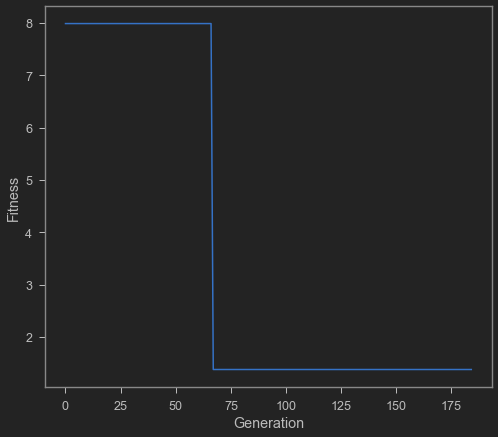

In [252]:
plt.plot(histori,marker='')
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.show()